## Introduction 
Antivenoms are antibodies purified from animals injected with small doses of venom, and are used to treat bites from venomous snakes. When the small dose of venom is injected into the host animal, they produce antibodies where the variable region is specific for binding to the antigen (toxin) and the constant region is specific for determining the function of the antibody. IgG (Immunoglobulin G) is a type of antibody that can bind and neutralize toxins, and is the type of antibody that is purified from host animals. Thus, I would like to use a local pairwise sequence alignment to find the similarities of the immunoglobulin heavy constant gamma 1 (IGHG1) in humans, mouse, cattle, horse and monkey. The IGHG1 gene sequence that is the most similar to the human IGHG1 sequence and the least similar will be further analyzed to look at protein structure. This will hope to gain insight on which host animal IgG1 is most similar to the human IgG1, which could be the better host animal to use to produce antivenom antibodies. 

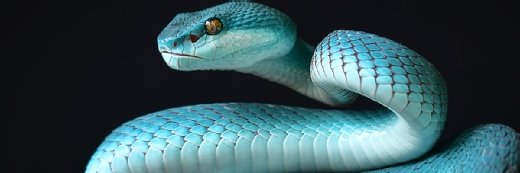

## Scientific Question
How can the production of antivenom antibodies be optimized in terms of the IgG antibodies that is generated in the host animal?

## Hypothesis 
If the immunoglobulin heavy constant gamma 1 (IGHG1) in mice, cattle, horse or monkey is the most similar to the IGHG1 of human IgG, and the protein structure of the human IgG1 and host animal IgG1 is similar, then that host animal would produce IgG neutralizing antibody that would function in the most similar way as endogenous human IgG, which could give researchers an insight on which animal could produce the most effective antivenom antibodies to treat snakebites in humans. 

## Project Overview 
In **Part 1** of this project, I performed local pairwise sequence alignment of the IGHG1 gene of the 4 species of interest against the human IGHG1 sequence. Dotplots are made to visualize each comparison alignment and the species with the highest and lowest similarity to the human sequence are chosen to be analyzed in Part 2. 

In **Part 2**, I performed structural bioinformatics on the IgG1 protein from chosen species in comparison to the human IgG1 protein. Differences in protein structure are first visualized using PyMOL, and 3D measurements of particular residues on the three structures are calculated. Based on the 3D measurements, conclusions can be made about how the sequence similarity of two genes can alude to their similarity in protein structure, which may give an insight to their similarity in function. 

The data for **Part 1** of this project was found by searching "immunoglobulin heavy constant gamma 1 (IGHG1)" on NCBI, a few IGHG1 from interesting species were chosen, and the following nucleotide sequences were downloaded:
- Homo sapiens (human): https://www.ncbi.nlm.nih.gov/gene/3500
- Mus musculus (house mouse): https://www.ncbi.nlm.nih.gov/gene/16017
- Bos taurus (cattle): https://www.ncbi.nlm.nih.gov/gene/281850
- Equus caballus (horse): https://www.ncbi.nlm.nih.gov/gene/?term=Equus+caballus+IGHC1
- Macaca mulatta (Rhesus monkey): https://www.ncbi.nlm.nih.gov/gene/708891

The data for **Part 2** of this project was found by searching IgG1 on RCSB PDB, a few IgG1 protein structures from select species were chosen, and the following PDB format files were downloaded:
- Homo sapiens (human): PDB ID = 1JPT https://www.rcsb.org/structure/1JPT
- Mus musculus (house mouse): PDB ID = 5DQJ https://www.rcsb.org/structure/5DQJ
- Macaca mulatta (Rhesus monkey): PDB ID = 4D9Q https://www.rcsb.org/structure/4D9Q

## Loading in packages
Pandas: Pandas is a package that provides fast, flexible, and expressive data structure and is mainly used for data analysis on "relational" or "labeled" data. It can work with tabular data, ordered and unordered time series data, arbitrary mix data, and any other form of observational/ statistical data sets. The two primary structures of Pandas are series (1-dimensional) and DataFrame (2-dimensional). Pandas is built on top of NumPy and is intended to integrate well within a scientific computing environment with many other third party libraries. More information about Pandas can be found here: https://pandas.pydata.org/docs/getting_started/overview.html  

Numpy: NumPy is a Python library that is used for working with arrays and conducting scientific computing. The ndarray object encapsulates n-dimensional arrays of homogeneous data types. NumPy arrays have a fixed size at creation, meaning that changing the size of an ndarray will create a new array and delete the original. Also, the elements in a NumPy array are all required to be of the same datatype. More information about NumPy can be found here: https://numpy.org/doc/stable/user/whatisnumpy.html

NGLview: NGLview is a Jupyter widget that allows you to interactively view molecular structures and trajectories from molecular dynamics simulations. NGLview provides fast and scalable molecular graphics, and coordinates are sent frame by frame to the notebook, which allows the viewing of large trajetories. In addition, NGLview supports showing data from the file-system, online databases, and from objects of many popular analysis libraries. More information about NGLview can be found here: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6031024/

Matplotlib: Matplotlib is a library for creating all kinds of visualizations in Python, ranging from static, animated, to interactive plots. PyPlot is a shell-like interface to Matplotlib and provides a MATLAB-style interface. In addition, PyPlot stores the state of an object when you first plot it. More information about Matplotlib and PyPlot can be found here: https://www.activestate.com/resources/quick-reads/what-is-pyplot-in-matplotlib/

Biopython: Biopython is a set of biological compuatations written in Python. More information about Biopython can be found here: https://biopython.org/
- The Bio.Align package has code to perform sequence alignments 
- The Bio.SeqIO package provides a simple uniform interface to input and output assorted sequence file formats 
- The Bio.pairwise2 module can perform pairwise sequence alignment using a dynamic programming algorithm. This module can perform both global and local alignments, and the match score and gap penalities can be specified
- The Bio.Seq module provides objects to represent biological sequences with alphabets 
- The Bio.pairwise2.format_alignment module formats the alignment into a string

In [90]:
import pandas as pd
import numpy as np
import nglview as nv
import matplotlib.pyplot as plt

from Bio import Align, SeqIO, pairwise2
from Bio.Seq import Seq
from Bio.pairwise2 import format_alignment
from Bio.PDB import *
from nglview.datafiles import PDB, XTC

## Performing Bioinformatics Analysis
First, the nucleotide sequences files are loaded into the notebook. txt stands for text file, and it is a type of computer file that contains plain text in the form of lines. 

In [79]:
# load in the nucleotide sequences and make it a seq object 
human = next(SeqIO.parse("human_IgG1.txt", "fasta")).seq
mouse = next(SeqIO.parse("mouse_IgG1.txt", "fasta")).seq
cattle = next(SeqIO.parse("cattle_IgG1.txt", "fasta")).seq
horse = next(SeqIO.parse("horse_IgG1.txt", "fasta")).seq
monkey = next(SeqIO.parse("monkey_IgG1.txt", "fasta")).seq

# human, mouse, cattle, horse and monkey are global variables

In [80]:
# print the length of each sequence
print(len(human))
print(len(mouse))
print(len(cattle))
print(len(horse))
print(len(monkey))

990
1479
1203
1014
1378


## Part 1A: Local Pairwise Alignment
Next, pairwise local alignments are perfomed, comparing each species of interest to the human sequence. Local alignments finds local regions in the sequence with the highest level of similarity, and a score is calculated that  can give an insight into how similiar two sequences are. I chose to perform a local alignment (over a global one) because I was unsure of how distantly related the sequences are. In addition, the sequences are of different lengths as well.

In this section, I used pairwise2.align.localxx, which is part of the Biopython package. This function reads in 2 sequences to be aligned, and the sequences can be strings, Biopython sequence objects, or lists. It returns a list of the alignments between the two strings and their alignment scores. In my function below, I read in seq objects and return the first alignment and its score.

In [81]:
# define a function that performs the pairwise alignment 
def align_me(seq1, seq2):
    alignment_seq1_seq2 = pairwise2.align.localxx(seq1, seq2)
    print(format_alignment(*alignment_seq1_seq2[0]))

# alignment_seq1_seq2 is a local variable

In [82]:
# local pairwise alignment between human and mouse
align_me(human, mouse)

2 C--CACCAAGGGCCCATCG-GTCT-TCCCC-CTGGCACCCT----C--CT-CC-AAGAGC-AC-CTC--TGGGGGCACA-GCAGCCCTGGGC-TGCCTGGTCAAGGA-CTACTTC-CCC-GAA-CCG-GTGACG-GTGT-CG-TGGAACTCAG-GCG--CCCTGA-CCAGCGGC-GTGCACACCTTCCCG-GCTGTCCTA-CAGTCCTCAGGACTCTACTC-C-CTC--AGCAGCGTG--GTGACCGTG-CCC-TCCAGCAGCT-TGGGCACC--C-AGACC-TACATC-TGCAACGTGAAT-CACA-AGCCCAG-C-A--A-CACCAAGGTGGACAAGAAAG-TTGA-GCCCAA---ATCT-TG-T-GACAA-AA-CTCA---CAC-ATGCCC-ACC-GTGCCCAGCACCTGA--ACTCCTGGGGGGACCGTCA-GTCTTCC-TCTTCCCCCCAAAA-CCCAAGGACA----C-C-CTCATGAT-CTCCCG-GACC-CCTGA-GGTCACATGC-GTG--GTGGTG-GACG-TG-AGCCACGA--A-GA-CCCTGAGGTCA-AGTTCAA-CTGGTACGTG-G-ACG--GC--GTGGAGGTGCAT-A-ATGC-CAAGAC-AAAGCCGC-GGGAGGAGCAGTA-CAACAGCACGTA--CCGTGTGGTCAG-C-GTC---CT-CACCG-TCC-TGCACCAGGACTGGCTG-AATGGCAAGGAGTA-CAAG-TGCAAGGTC-TCCAACAAAGC--C--CT--CCCA-GCCCCCATCGAGAAAACCATCTCCAAAG-CCAAAGGGCAGCC-CCGAGAA--C-C-ACAGGTGTACACCC-TG-CC-CC-C--AT-----C------CC--GG-----G--A-T--GA---GC-TGA---C---C----------AAGA-A---C----------CAG-G---T---CAGCC----------T----GA-C-CT--GCC--T---GGT-CA-A-A-GGCTTCT-A

In [83]:
# local pairwise alignment between human and cattle
align_me(human, cattle)

1 T--CCA-CCAAGGGCCCATCG-GTCTTCCCCCTG---G-C-ACCCTCCTCCAAGAGCAC--CT--CTG-GGGG-CA---C-AGC---A--G---CCCTGGGCTGCCTGGTCA---AGGACTACT-TC-CCCGAA-CCGGTGACG-GTGT-CG-TGGAACTCAGGCG--CCCTGACCAG--CGGCGTGCACACCTTCCCGGCTGTCCTA-CAGTCCTCA-GGA-CTC-TACTCC-CTCAGCAGCG-TGGTGACCGTGCCCT-CCAGCAGCTTG--GGCACCCAGACCTA-CATC-TGCAACGTGAAT-CACA-AGCCCAG-C-A--A-CACCAAGGTGGACAAGAAAG-T-T-GAG-CCCAAATCTTG-TGACAAAACTCACA-CATGCCC----ACC-GT-GCCCAGCACC--TGAA-CTCCTGG--GG-GGACCG-TCA-GTCTTCC-TCTTCCCC-CCA-AAACCCAAGGACACCCTCATG-A-TCTCCCGG-A-C-CCCTGAGGTCACA-TGC-GTGGTGGTGGACGTGAG-CCACGAA-GACCCT-GAGGTC-AAGTTCAA-C-TGGTA-CGTGGACGG-CGTGGAGGTGCATAATGCCA-AG--AC-A--AAGCCGCG-G-GAGGAGCAGTA-CAACAGCACG-TACCGT-GTGGTCAGCGTCCTCAC--CG--TCCT-GCACCAGGACTGG-CTGA-ATGGCAA-GGAGTA-CAAGTGCAAGGTCTC-CAACA-AAGC-CCTCCCAG-CCCCCATCGA-GAAA--ACCATCTCCAAAG--CCAAAGGGCAGC--CCCGAGA-A-CCA-CAGGTGTACAC---CCTGC-CCCCATCCCG--GGAT-GAGCTGAC--CAAGAAC-CA-GGTCAGCCTG-ACCTGCC-TGGTCAA--AGGCTTCTATCCCAG-CG-ACATCGCCGTGGAGTGGG-AGAGCAAT--GGGCAGCCG-GAG----A--ACAAC-TACA---A-GACCACGC-CTCCCG

In [84]:
# local pairwise alignment between human and horse
align_me(human, horse)

1 TCCACCAAGG--GCCCATCG--G-TCTTCCC-C-CTGGCACCCTCCTCCAAGAGCACCTCTGG-GGG-C-ACA---G-C---A-G----CCCTGGGCTGCCTG-GTCAA---GGACTACTTCCCCGAA-CCG-GTGAC-GGTGTCG-TGGAACTCAGGCGC-CC-TGACCAGC-GGCGTGCACACCTTCCCGGCT---GTCCTA-CAGTCC-TCAGGAC-T-CTACTCCCTCAGCAGCG-TGGTGACCGTGCCCTCCAGC-AGCTT-G-GGCACC--C-AGACCTACATCTGCAACGTGAA-TCACAA-GC--CCAGCAACAC--CAAGGTGGACAAGA-AAGTT-GAGCCCAAATCTTGT---GACAAA--AC-------T---C-ACA----CA--TG-CCCACCG--TGCCCAGCA-CCTGAA-CTCCTGGG-GGGACCGT-CAG-TCTTCC-TCTTCCCCCCAA-AA-CCCAAGGACACCCTCATGATCT-CCCGGA-C-CCCTGAGGTCACA-TGCGTGGTGGTGGAC-GTGAGCCACGA-AGA-CCCTGAG-GTCAAGTTCAACTGGTACG-TGGACGGCG-TGGAGGTGCAT--A-ATGCCAA-GACAA-AGCCGC-G--GGAGGAGCAGTA-CAACAGCACGT-ACCGT-GTGGTCAGCGTCCTCACCG--TCCT-GCACCAGGACTGGCTGAAT--GGCAA-GGAGTA-CAAGTGC-AAGGTCTCCAACAA--A-GCCCTCCCAGCC--CCCATCGAGAAA--ACCATCT-CCAAAG-CCAAAGGGCAGC--CCCGAGA-A-CCA-CAG-GTGTACAC--CCTG-CCCC-CATCCCGG-GAT-GAGCTGA-CCAAGAAC-CA-GGTCAGCC-TGACCTGCCTGGTCAAAGG-CTTCTATCCCAGC--GACA-TCGC--CG-TG-GAGTGGG-AGAGC-AATGGGCAGCCG-GAG----A-AC-AAC-TACAAG-ACCACGCCT---CCC

In [85]:
# local pairwise alignment between human and monkey
align_me(human, monkey)

1 T----C----------C-A--------C------CA--AG---GG--C-C-C--A-T-C----G-G---------T---C--T---T------C-----C-------CC-CTG-GC---------A-C-C---C-----------TC-C-T--C-C-A----------AG-----A----G--C--A-C---CT-C----TGG-G----------GG--CAC-----AG--CA--GC--CC-TGGGCTGCCTGGTCAAGGACTACTTCCCC-GAACCG-GTGACG-GTGTCGTGGAACTCAGGCG-CCCTGACCAGCGGCGTGCACACCTTCCCGGCTGTCCTACAGTCCTCAGGA-CTCTACTCCCTCAGCAGCGTGGTGACCGTGCCCTCCAGCAGCTTGGGCACCCAGACCTACA-TCTGCAACGTGAAT-C-ACAAGCCCAGCAACACCAAGGTGGACAAGAA-AGTTGAGCCCA-AAT---C-T-TG-TGA----CA--AAAC-TCACACA--TGCCCACCGTGCCCAGCACCTGAACTCCTGGGGGGACCGTCAGTCTTCCTCTTCCCCCCAAAACCCAAGGACACCCTCATGATCTCCCGGACCCCTGAGGTCACATGCGTGGTGGTG-GACGTGAGCCACG-AAGACCCT-GAG-GTCAAGTTCAACTGGTACGTGGA--CGGCGT-GGAGGTGCATA-ATGCCA-AGACA-AAGCCG-CGGGAGGA-GCAGTACAACAGCACG-TAC-CGTGTGGTCAGCGTCCTCACCGTC-CTGCACCAGGACTGGCTGAAT-GGCAAGGAGTACAA-GTGCAAGGTCTCCAACAAAGCCCTCCCAG-CCCCCATCG-AGAAAACCATCTCCAAAGC-CAAAGGGCAGCCCCGAGAA-CCA-CAGGTGTACACCCTGCCCCCA-TCCCGGGATG-AGCTGACCAAGAACCAGGTCAGCCTGACCTGCCTGGTCAAAGGCTTCTATCCC-AGCGACAT

In [86]:
# print out just the score of each alignment

aligner = Align.PairwiseAligner() # aligner is a global variable

print("The alignment score between human and mouse is " + str(aligner.score(human, mouse)))
print("The alignment score between human and cattle is " + str(aligner.score(human, cattle)))
print("The alignment score between human and horse is " + str(aligner.score(human, horse)))
print("The alignment score between human and monkey is " + str(aligner.score(human, monkey)))

The alignment score between human and mouse is 814.0
The alignment score between human and cattle is 819.0
The alignment score between human and horse is 821.0
The alignment score between human and monkey is 942.0


From the alignment score, the rank of species of interest from most similar to humans to least similar is:
**Monkey > Horse > Cattle > Mouse**

I wanted to see if this trend is repeated using a website alignment tool, so I performed local pairwise alignments using **EMBOSS WATER** with the same nucleotide sequences loaded in above.
https://www.ebi.ac.uk/Tools/psa/emboss_water/
- human vs mouse: identity = 72.5%
- human vs cattle: identity = 76.0%
- human vs horse: identity = 77.7%
- human vs monkey: identity = 92.5%

The trends of most similiar to the human sequence to least similar using EMBOSS WATER is also: **Monkey > Horse > Cattle > Mouse**

Since the monkey IGHG1 sequence is the most similar to the human IGHG1 sequence, and the mouse IGHG1 is the least similar, I will be comparing the protein structures of IgG1 from those three species.

## Part 1B: Dotplots
Before looking at the protein structure, I will visualize each pairwise alignment with dotplots. Dotplot is a way to visualize two biological sequences and identifying regions of similarity after sequence alignment, with one sequence  placed on the x-axis and another on the y-axis. When the residues of both sequences match at the same x and y coordinate, a dot is drawn. In my case, I set the window size to 3, meaning that the function will compare 3 nucleotides at a time. Dots that are plotted  combine to form a diagonal line, which signifies that there is similarity between the two sequences. Disruption in the line can suggest that there are insertions and/or deletions, and a faint line can suggest that the sequences are less similar. 

In [11]:
window = 3 # window is a global variable

# define a function that makes the dotplot
def make_dotplot(seq1, seq2): 
    data = []
    # data is a local variable 
    for j in range(len(seq1) - window): 
    # iterating over the length of the first sequence minus the window size (because comparing 3 nts at a time, 
    # the last comparison would be the 3rd to last nucleotide)
        for i in range(len(seq2) - window): 
        # iterating over the length of the second sequence minus the window size
            data.append(seq1[i : i + window] != seq2[j : j + window]) 
            # a comparison of 3 nucleotides of the same index range is made between the 2 sequences, 
            # and False is appended into the empty list if the two sequences are equal to each other     
    numpy_data = np.array(data).reshape(len(seq1) - window, len(seq2) - window) # reshape the data list into an array with the correct dimensions 
    # numpy_data is a local variable
    plt.gray() # this sets the color map to gray
    plt.imshow(numpy_data) # this displays the numpy_data array as an image 
    plt.show() #shows the plot

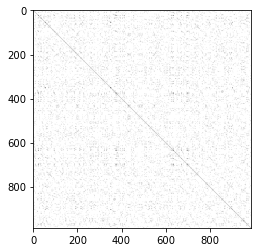

In [76]:
make_dotplot(human, human) # a visual reference to show what an alignment of very high similarity looks like
                           # the similarity is very high because the sequences being compared are the same 
                           # note that there are no disruptions in the diagonal, and it is a very distinct, dark line

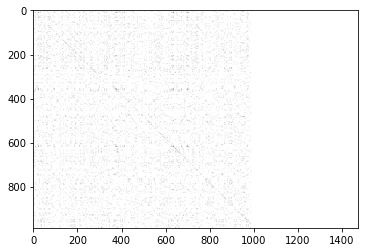

In [13]:
make_dotplot(human, mouse)

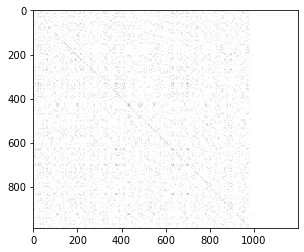

In [14]:
make_dotplot(human, cattle)

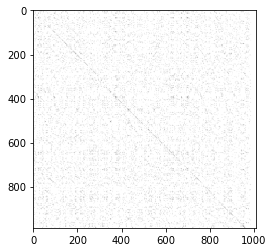

In [15]:
make_dotplot(human, horse)

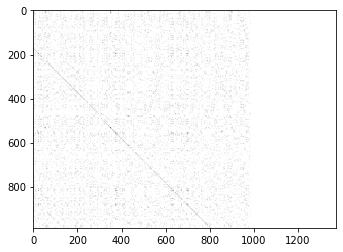

In [16]:
make_dotplot(human, monkey)

## Part 2A: Structural Bioinformatics

Next, I will be comparing the protein structure of IgG1 from monkey and mouse to human IgG1. Structural bioinformatics is the analysis and prediction of the 3D structure of biological macromolecules such as proteins, RNA, and DNA. It can make generalizations about macromolecular 3D structure, and it builds off of experimentally solved structures and computational models. I will be using the PyMOL software to visualize my protein structures and compare them to find qualitative differences in protein shape and amino acid residues. 

The data used for this portion of the project are .pdb files, which stands for Protein Data Bank. It is a textual file format that describes the 3D structures of molecules held in the Protein Data Bank.

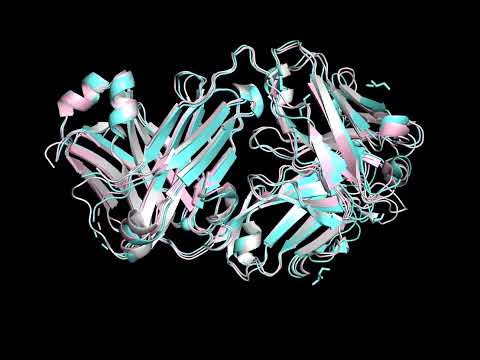

In [31]:
from IPython.display import YouTubeVideo

YouTubeVideo('c8yh9cXpklI', width=800, height=300) # this displays my PyMOL movie of the structure comparisons

Frame by frame explanation of PyMOL movie:
- pink structure: 1JPT (human)
- blue structure: 4D9Q (monkey)
- white structure: 5DQJ (mouse)

Frame 1) the white structure (mouse) has 2 loops at the middle and left side of the frame that protrudes out more than the other structures

Frame 2) the white structure (mouse) has a loop at the middle of the frame that protrudes out more than the other structures

Frame 3) the white structure (mouse) has a loop at the middle of the frame that protrudes out more than the other structures, and the other two structures (human and monkey) have breaks in their loop

Just by comparing the protein structures visually, it is evident that the human and monkey structures are more similar, with the mouse structure being more different. 

Next, I loaded in the pdb files into the notebook and displayed each protein structure.

In [24]:
parser = PDBParser() # create a PDBparser object
human_structure = parser.get_structure("1jpt", "1jpt.pdb") # get the 3D structure of each protein from species of interest
monkey_structure = parser.get_structure("4d9q", "4d9q.pdb")
mouse_structure = parser.get_structure("5dqj", "5dqj.pdb")
# parser, human_structure, monkey_structure, mouse_structure are all global variables 

/Users/emilyliu/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 3694.
  warnings.warn(
/Users/emilyliu/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 3873.
  warnings.warn(
/Users/emilyliu/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10765.
  warnings.warn(
/Users/emilyliu/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10788.
  warnings.warn(
/Users/emilyliu/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10812.
  warnings.warn(
/Users/emilyliu/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstruct

In [87]:
nv.show_biopython(human_structure) # this shows the structure of 1jpt 

NGLWidget()

In [88]:
nv.show_biopython(monkey_structure) # this shows the structure of 4d9q

NGLWidget()

In [89]:
nv.show_biopython(mouse_structure) # this shows the structure of 5dqj

NGLWidget()

## Part 2B: 3D Measurements
In this section, the 3D measurements of each protein structure is calculated. Specific residues that are visually different (determined using PyMOL above), are used to make the calculations. The residues that I want to compare are the following (from Frame 2): 
- human: 53 (P), 56 (G)
- monkey: 53 (T), 56 (G)
- mouse: 53 (R), 55 (G)

I then calculate the distance between the alpha carbon for each pair of residues and compare the distance between the species of interest.

In [73]:
residues_human = [r for r in human_structure.get_residues()] # this gets the residues in the 1jpt structure

# calculate the distance between the alpha carbon for a pair of residues
one_human = residues_human[53]['CA'].get_coord() # this gets the index 53 residue coordinate
two_human = residues_human[56]['CA'].get_coord() # this gets the index 56 residue coordinate
print('{} - {} = {}'.format(one_human,two_human,np.linalg.norm(one_human-two_human))) # this calculates the matrix norm

# residues_human, one_human, and two_human are global variables 

[-13.999 -19.03    5.259] - [ -6.654 -21.273   8.919] = 8.507389068603516


In [74]:
residues_monkey = [r for r in monkey_structure.get_residues()] # this gets the residues in the 4d9q structure

# calculate the distance between the alpha carbon for a pair of residues
one_monkey = residues_monkey[53]['CA'].get_coord() # this gets the index 53 residue coordinate
two_monkey = residues_monkey[56]['CA'].get_coord() # this gets the index 56 residue coordinate
print('{} - {} = {}'.format(one_monkey,two_monkey,np.linalg.norm(one_monkey-two_monkey))) # this calculates the matrix norm

# residues_monkey, one_monkey, and two_monkey are global variables

[-17.779  -7.925 -83.431] - [-22.521 -12.471 -81.726] = 6.786730766296387


In [75]:
residues_mouse = [r for r in mouse_structure.get_residues()] # this gets the residues in the 5dqj structure

# calculate the distance between the alpha carbon for a pair of residues
one_mouse = residues_mouse[53]['CA'].get_coord() # this gets the index 53 residue coordinate
two_mouse = residues_mouse[55]['CA'].get_coord() # this gets the index 55 residue coordinate
print('{} - {} = {}'.format(one_mouse,two_mouse,np.linalg.norm(one_mouse-two_mouse))) # this calculates the matrix norm

# residues_mouse, one_mouse, and two_mouse are global variables

[32.531 15.479 98.718] - [38.26  15.289 98.948] = 5.736762046813965


In [65]:
# the distances between residues are summarized below
human_dist = 8.51
monkey_dist = 6.79
mouse_dist = 5.74

# human_dist, monkey_dist, mouse_dist are all global variables 

In [72]:
# compare monkey and mouse distance to human

human_vs_monkey = human_dist - monkey_dist
human_vs_mouse = human_dist - mouse_dist
# human_vs_monkey and human_vs_mouse are global variables

print("The difference in distance of select residues between human and monkey is " + str(round(human_vs_monkey,2)))
print("The difference in distance of select residues between human and mouse is " + str(round(human_vs_mouse,2)))

The difference in distance of select residues between human and monkey is 1.72
The difference in distance of select residues between human and mouse is 2.77


## Data Analysis 
From the **local pairwise sequence alignment** comparing the IGHG1 sequence in species of interest to the human IGHG1 sequence, I concluded that the monkey sequence was the most similar to human and the mouse sequence was the least similar (the alignment score was 942.0 and 814.0 respectively). The overall trend from most similar to least similar was Monkey > Horse > Cattle > Mouse. 

I can further conclude that the monkey sequence is most similar to the human sequence from the **dotplot** comparing human and monkey. The darkness of the line is darker than the other dotplots, and the line also has less disruptions/ breaks compared to the other dotplots. This all suggests that the monkey IGHG1 sequence is the most similar to human IGHG1 sequence. Thus, the monkey sequence (most similar to human) and the mouse sequence (least similar to human) are chosen to perform structural bioinformatics on.

Using **PyMOL**, I found qualitative differences between the human, monkey and mouse IgG1 protein stuctures. From the PyMOL movie, we can conclude visually that the human and monkey IgG1 protein structure are more similar, while the mouse IgG1 protein structure is more different. 

The distances between specific residues are then calculated using **3D measurements**. From this calculation, we can conclude again that the human and monkey IgG1 protein structure are more similar, while the mouse IgG1 protein structure is more different. The difference in distance of select residues between human and monkey was smaller than the difference in distance of select residues between human and mouse (the difference was 1.72 and 2.77 respectively).

Since the IGHG1 gene sequence of Rhesus monkey is the most similar to the IGHG1 of human, and the protein structure of the human IgG1 and monkey IgG1 is similar, the conclusion that Rhesus monkeys could be a host animal that could produce the most effective antivenom antibodies to treat snakebites in humans can be made. Further experiments, such as using human cell line models or humanized mouse models to test the efficacy of antivenom produced by different species, would be needed to determine which host species would be the best for producing antivenom. Thus, the conclusion from this project that Rhesus monkey IgG1 is the most similar to human IgG1, in terms of sequence and protein structure, can be used as a starting point in the efforts to optimize the production of antivenom antibodies to treat snakebites in humans.